In [1]:
%pip install scikit-learn

%reset -f

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import numpy as np

a. Understanding the dataset:

1. Import the dataset in a notebook environment with python library : “Pandas”

In [3]:

data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")


2. Show the number of attributes (columns) and number of records (rows)

In [4]:
data.shape

(1470, 35)

3. Show the statistics of the dataset ( column wise mean, standard deviation, max,min etc)

In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


4. Count the number of missing values in the dataset

In [6]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

5. Count the number of duplicate values in the dataset

In [7]:
data.duplicated().sum()

0

b. Data cleaning:

1. If you find any missing values in the dataset ( nan values) replace those data with
the column wise mean.

In [8]:
data.fillna(data.select_dtypes(include=['number']).mean(), inplace=True)

If a column which datatype is string datatype (categorical or object)  , replace its missing value with mode of the column

In [9]:

for column in data.select_dtypes(include=['object']).columns:
    if column != 'Attrition':  
        mode_value = data[column].mode()[0]
        data[column].fillna(mode_value, inplace=True)


2. If you find any duplicates in the dataset, keep just one copy of the data

In [10]:
data.drop_duplicates(inplace=True)

3.Remember, if any row in the target column (Attrition) is missing, you must drop
that row

In [11]:
data.dropna(subset=['Attrition'],inplace=True)

c. Creation of input and output features:

In [12]:
Features = data.drop('Attrition',axis=1)
Labels = data['Attrition']

In [13]:
Features

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [14]:
Labels

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

d. Conversion of features into numeric values:

Label encoding

In [15]:


#As Attrition feature has only 2 values , so label encoding is much better than one hot encoding
encoder = LabelEncoder()
Labels = encoder.fit_transform(Labels)
Labels


array([1, 0, 1, ..., 0, 0, 0])

One hot encoding

In [16]:
Features.dtypes

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

Convert such columns which are not numeric types, into categorical types

In [17]:

non_one_hot_columns = []
for c in Features.columns:
    if not pd.api.types.is_numeric_dtype(Features[c]):
        Features[c] = Features[c].astype('category')
    else:
        non_one_hot_columns.append(c)


In [18]:
Features.dtypes

Age                            int64
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                      int64
EducationField              category
EmployeeCount                  int64
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
Gender                      category
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                     category
JobSatisfaction                int64
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                      category
OverTime                    category
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StandardHours                  int64
StockOptionLevel               int64
T

In [19]:

for c in Features.columns:
    if Features[c].dtype == 'category' :
        if Features[c].nunique() == 2 :
            Features[c] = encoder.fit_transform(Features[c])
        else :
            Features = pd.get_dummies(Features,columns=[c],drop_first=True)



In [20]:
Features.dtypes

Age                                  int64
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EmployeeCount                        int64
EmployeeNumber                       int64
EnvironmentSatisfaction              int64
Gender                               int32
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
OverTime                             int32
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StandardHours                        int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBal

In [21]:
Features.shape

(1470, 47)

In [22]:
Features.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Direct

e. Scaling of the features:

Standard Scaling (Z-score normalization)

In [23]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler_std = StandardScaler()
scaler_min = MinMaxScaler()

def Scaling(choice):
    for c in non_one_hot_columns:
        if choice == 'StandardScaler':
            Features[c] = scaler_std.fit_transform(Features[[c]])
            
        else:
            Features[c] = scaler_min.fit_transform(Features[[c]])



In [24]:
Scaling(choice='MinMaxScaler')

f. Correlation Analysis:

In [25]:
df_Features = pd.DataFrame(Features,columns=Features.columns) 

df_Label = pd.DataFrame(Labels,columns=['Attrition'])

Label_series = df_Label['Attrition']

correlations = df_Features.corrwith(Label_series)
correlations

C:\Users\AJOY DEY\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\AJOY DEY\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Age                                 -0.159205
DailyRate                           -0.056652
DistanceFromHome                     0.077924
Education                           -0.031373
EmployeeCount                             NaN
EmployeeNumber                      -0.010577
EnvironmentSatisfaction             -0.103369
Gender                               0.029453
HourlyRate                          -0.006846
JobInvolvement                      -0.130016
JobLevel                            -0.169105
JobSatisfaction                     -0.103481
MonthlyIncome                       -0.159840
MonthlyRate                          0.015170
NumCompaniesWorked                   0.043494
OverTime                             0.246118
PercentSalaryHike                   -0.013478
PerformanceRating                    0.002889
RelationshipSatisfaction            -0.045872
StandardHours                             NaN
StockOptionLevel                    -0.137145
TotalWorkingYears                 

Correlation Matrix

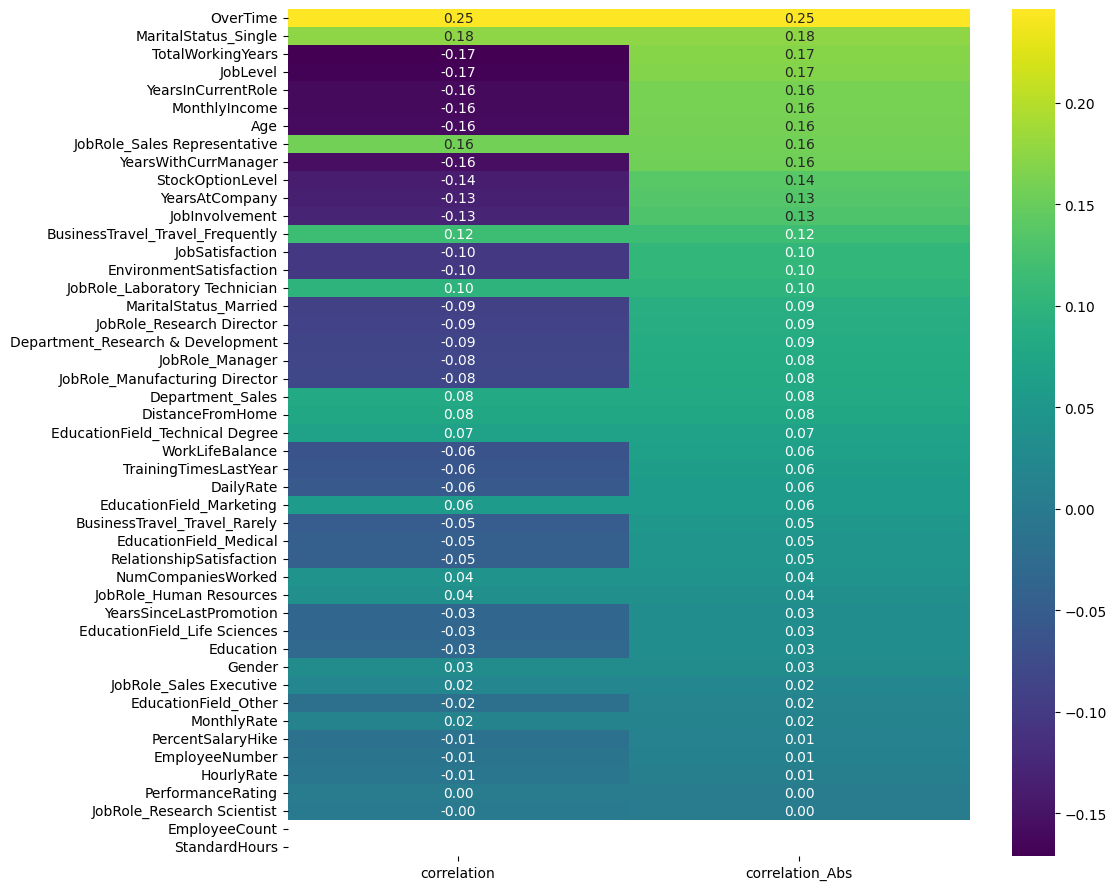

In [26]:

import seaborn 
import matplotlib.pyplot as plot


matrix_correlation = correlations.to_frame()
matrix_correlation.columns = ['correlation']
matrix_correlation['correlation_Abs'] = matrix_correlation['correlation'].abs()
matrix_correlation = matrix_correlation.sort_values(by='correlation_Abs', ascending=False)
plot.figure(figsize=(11, 11))
seaborn.heatmap(matrix_correlation, annot=True, fmt=".2f", cmap='viridis')
plot.show()


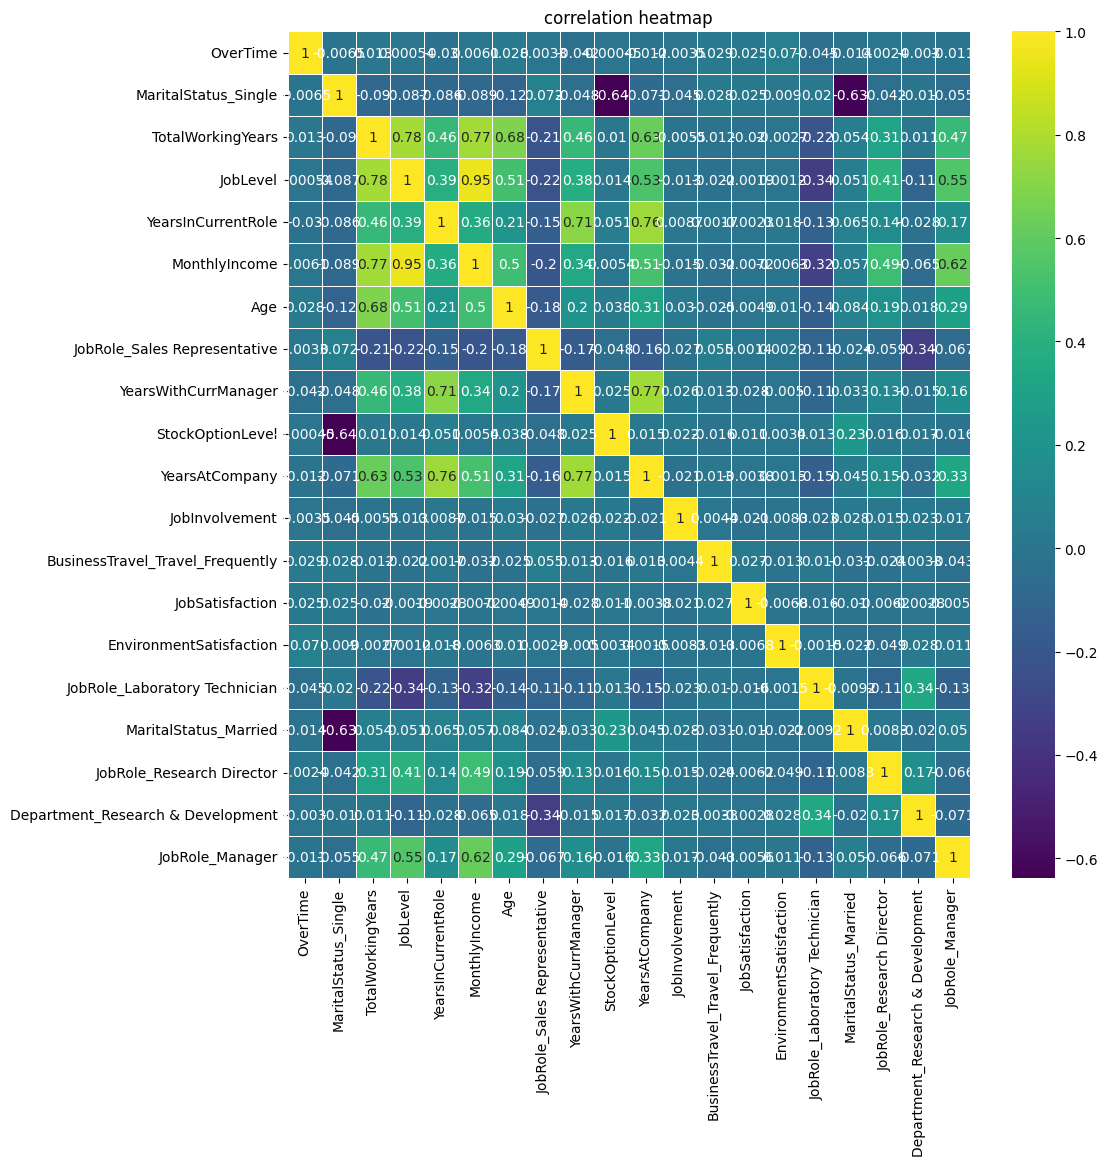

In [27]:

correlations_abs = correlations.abs()

correlations_sorted = correlations_abs.sort_values(ascending=False)

Features_top_20 = correlations_sorted.index[:20]
corr_matrix_top_20 = df_Features[Features_top_20].corr()
Features = Features[Features_top_20]
plot.figure(figsize=(11, 11))
seaborn.heatmap(corr_matrix_top_20, annot=True, cmap="viridis", linewidths=0.5)
plot.title('correlation heatmap')
plot.show()


1D scatter plot 

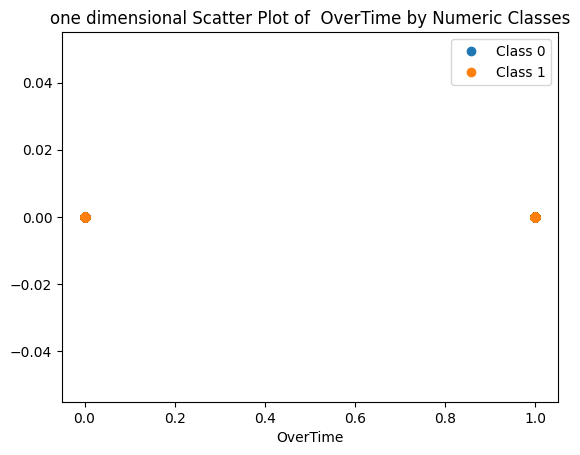

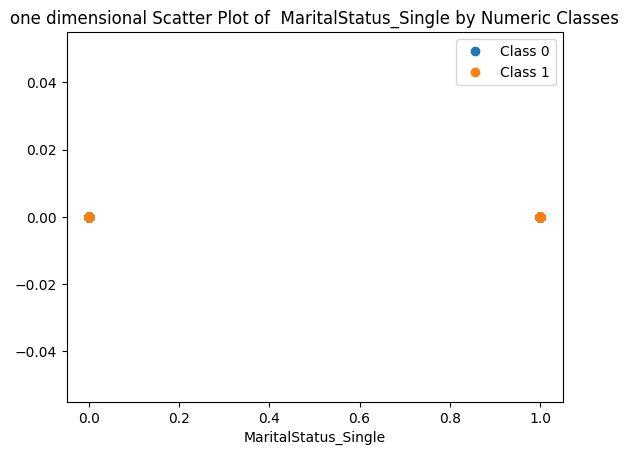

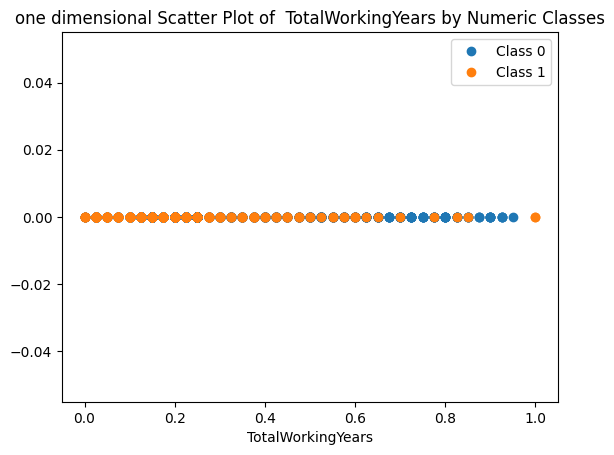

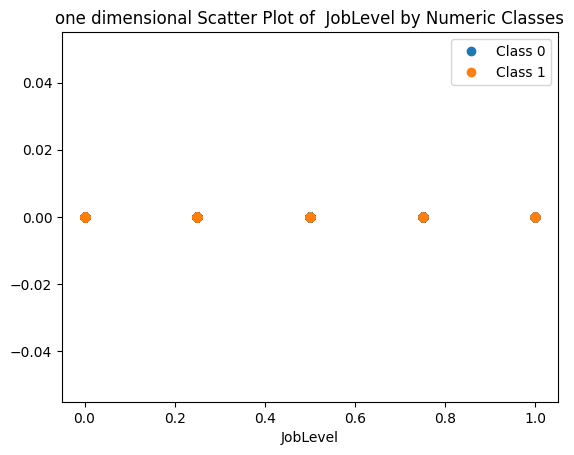

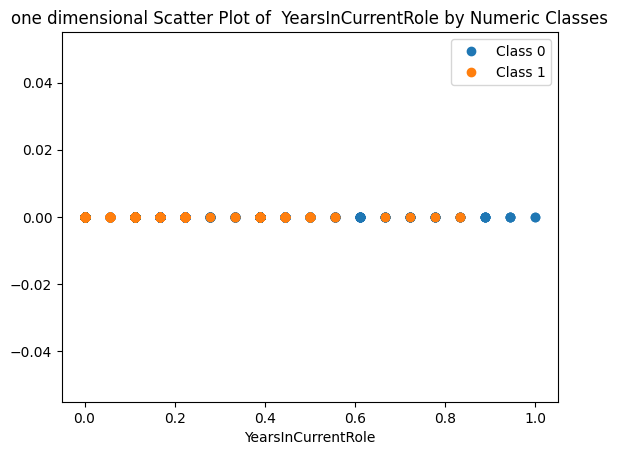

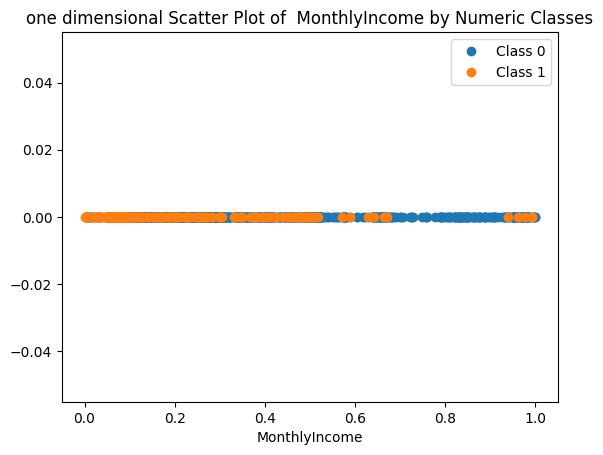

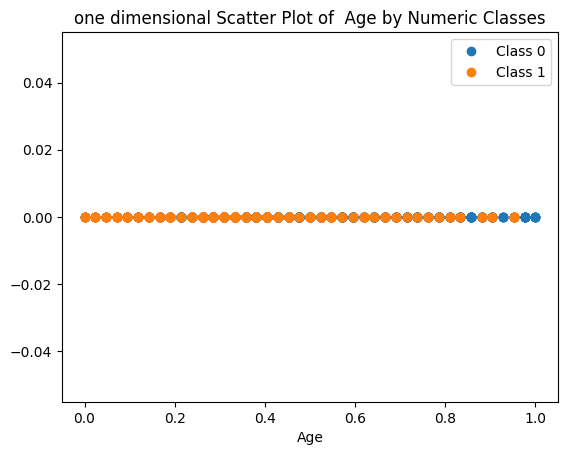

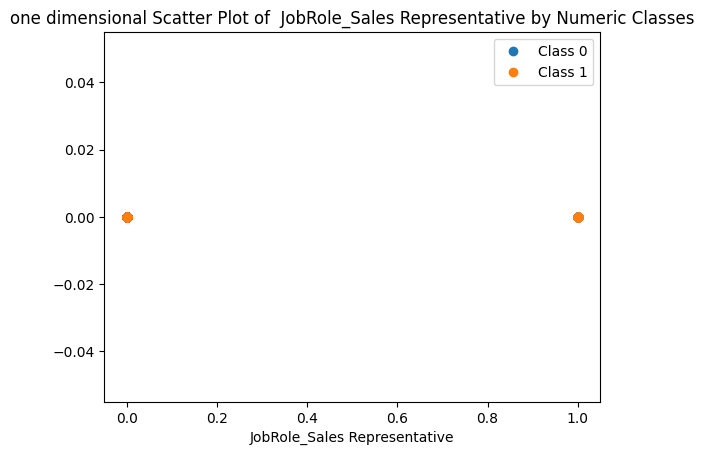

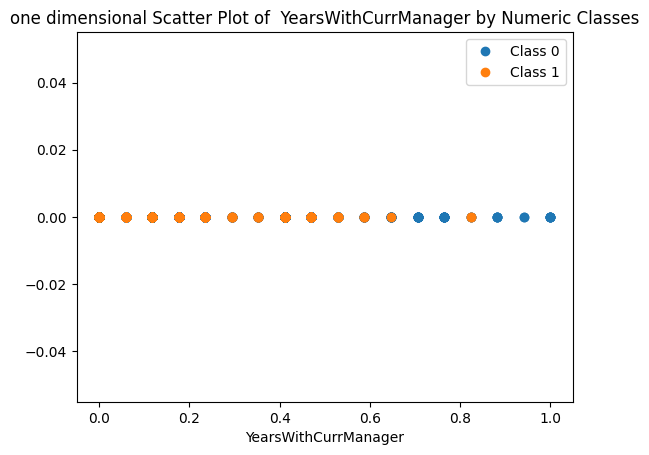

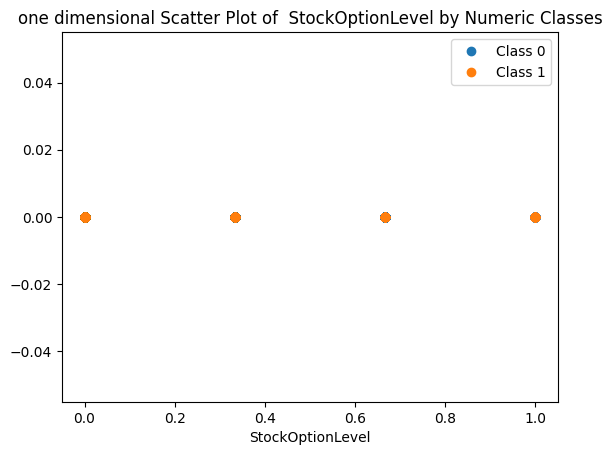

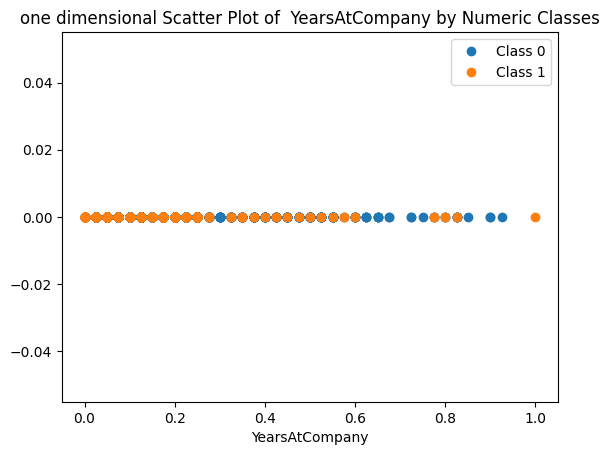

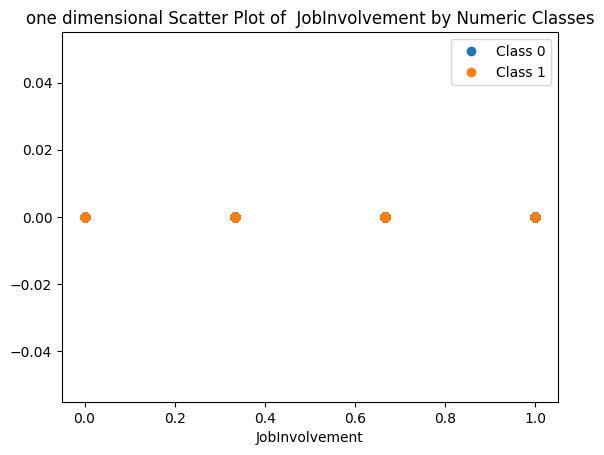

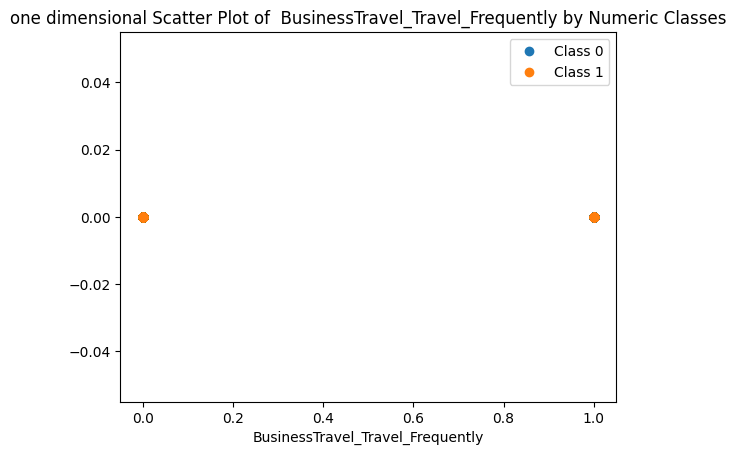

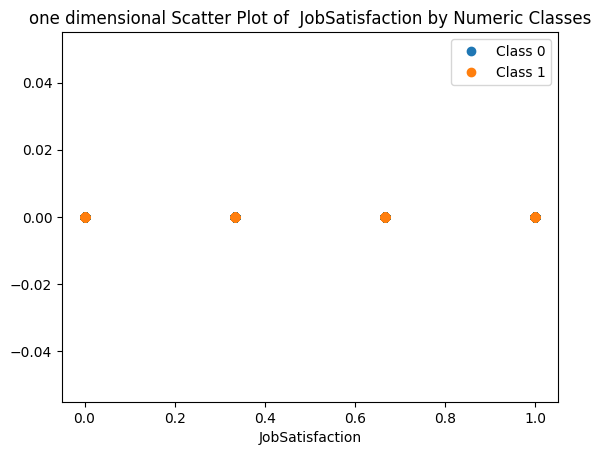

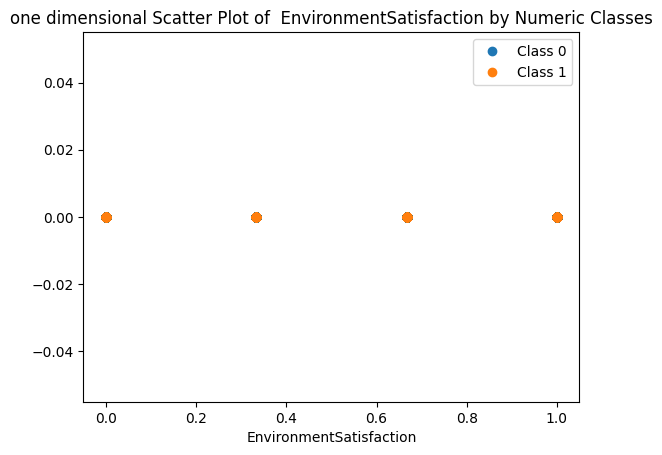

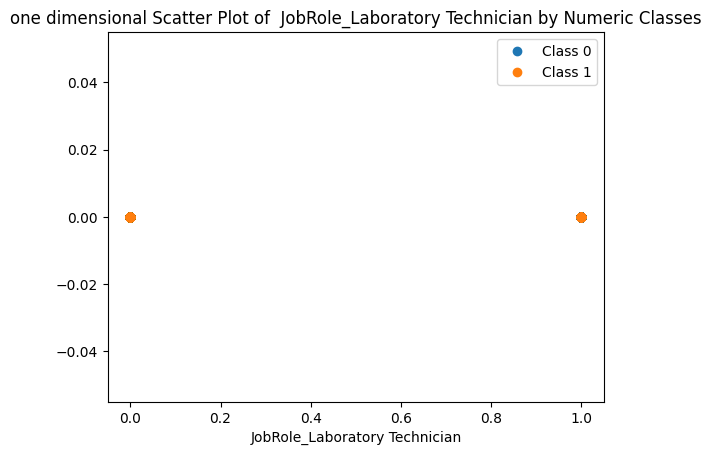

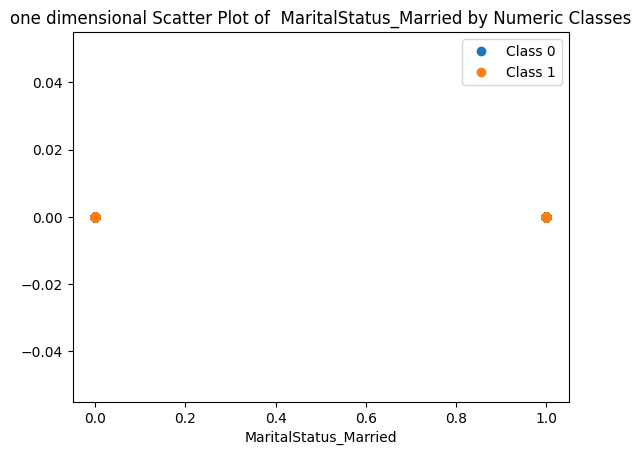

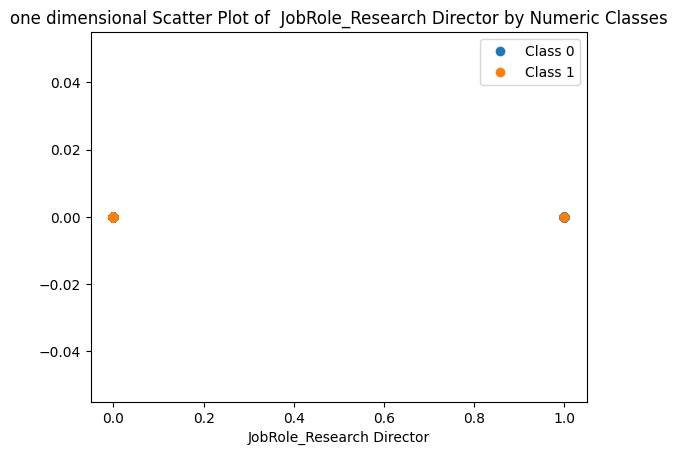

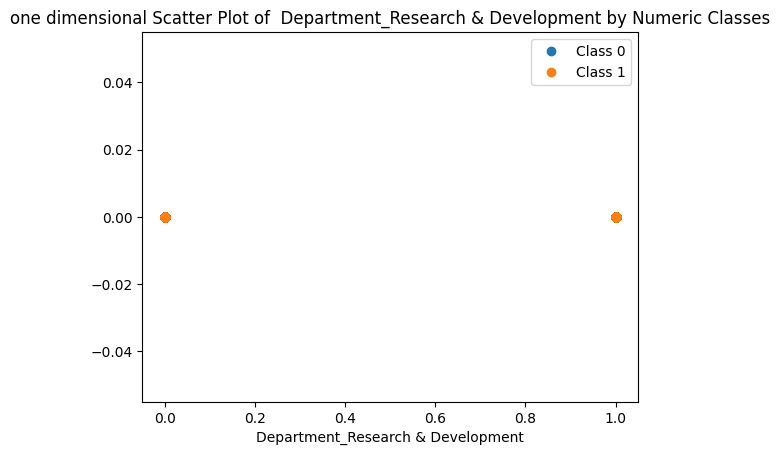

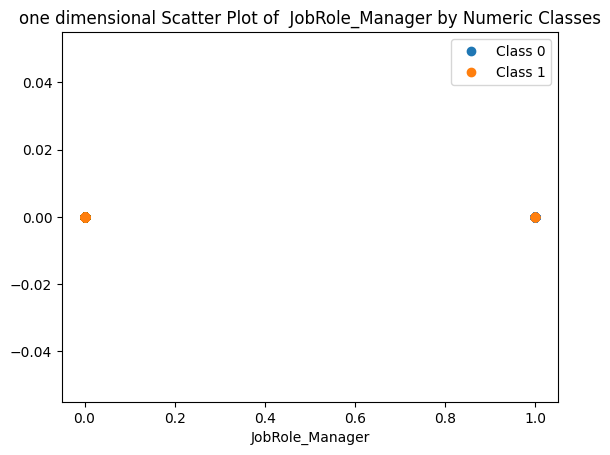

In [28]:
import matplotlib.pyplot as pt


for column_name in Features_top_20:
    
    class_0 = df_Features.loc[df_Label["Attrition"] == 0]
    class_1 = df_Features.loc[df_Label["Attrition"] == 1]

    
    pt.plot(class_0[column_name], np.zeros_like(class_0[column_name]), 'o', label='Class 0')
    pt.plot(class_1[column_name], np.zeros_like(class_1[column_name]), 'o', label='Class 1')

    pt.legend()
    pt.xlabel(column_name)
    pt.title(f'one dimensional Scatter Plot of  {column_name} by Numeric Classes')
    pt.show()


g. Validating the pipeline (Bonus Task) :

In [29]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Assume X and y are your input matrices
# X --> (number of rows, number of columns), already scaled

X = Features
# y --> binary target class (0 or 1)
y = Labels
# Dummy example data (replace these with your actual data)
# X = np.random.rand(100, 5) # Example feature matrix with 100 rows and 5 columns
# y = np.random.randint(0, 2, 100) # Example binary target vector
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 2: Initialize the Logistic Regression classifier
clf = LogisticRegression()
# Step 3: Train the classifier on the training data
clf.fit(X_train, y_train)
# Step 4: Make predictions on the test set
y_pred = clf.predict(X_test)
# Step 5: Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression classifier: {accuracy:.2f}")

Accuracy of Logistic Regression classifier: 0.88
